In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_colwidth', -1)
pd.set_option("display.max_rows", 20)

Importam fisierele csv care contin anunturile cu apartamentele si garsoniere de vanzare

In [3]:
path_apartamente = r'C:\Users\Scurtu Mihai\Desktop\proiect\anunturi_piata_apartamente.csv'
path_garsoniere = r'C:\Users\Scurtu Mihai\Desktop\proiect\anunturi_piata_garsoniere.csv'

In [4]:
df = pd.read_csv(path_apartamente, sep='\t', encoding='utf-8')
df_g = pd.read_csv(path_garsoniere, sep='\t', encoding='utf-8')

Garsonierele fiind doar cu o camera pe site nu apare categoria "numar camere" asa ca vom creea in data frame o noua coloana "numar_camere" si vom pune valoarea "1" pentru toate garsonierele.

In [5]:
df_g['numar_camere'] = 1

Unim dataframe-urile

In [6]:
data = df.append(df_g)

In [7]:
data = data[data['titlu'] != 'Nu a fost deschis anuntul']

In [8]:
len(data)

8270

In [9]:
coloane = data.columns.tolist()

Coloanele cele mai importante le vom introduce intr-o lista "first"

In [10]:
first = ['pret', 'etaj', 'vechime_imobil', 'numar_camere', 'cartier', 'suprafata', 'compatimentare']

Vom face cate o lista care sa fie conforma cu tipul de date a coloanelor.
De exemplu in "coloane_bool" vom avea acele caracteristi pe care un utilizator cand introduce un anunt pe site poate alege sa bifeze in dreptul caracteristicii.
In "coloane_liber" utilizatorul poate introduce ce valori doreste.
In "coloane_selectat" utilizatorul trebuie sa selecteze dintr-un set de valori pe care site-ul le pune la indemana.

nota: cand vorbim de utilizator ma refer la utilizatorul care introduce un anunt pe site-ul www.piata-az.ro

In [11]:
coloane_bool = [
 'geamuri_termopan',
 'centrala_termica',
 'parchet',
 'gresie',
 'faianta',
 'zugravit_lavabil',
 'loc_parcare',
 'modificari_interioare',
 'balcoane_inchise',
 'aer_conditionat',
 'loc_in_pod',
 'loc_in_pivnita',
 'uscator']

In [12]:
coloane_liber = ['titlu',
 'pret',
 'descriere',
 'agentie',
 'strada',
 'suprafata',
 'link']

In [13]:
coloane_selectat = [
 'oras',
 'grad_finisare',
 'tip_oferta',
 'persoana',
 'etaj',
 'vechime_imobil',
 'numar_bai',
 'numar_balcoane',
 'compatimentare',
 'confort',
 'cartier']

Vom crea cate functii care ne ajuta sa grupam coloanele in functie de tipul de date, care ne ajuta sa vedem cate valori unice avem si cate valori nule avem intr-o lista de coloane

In [14]:
def valori_unice(col):
    for x in col:
        print('{0} \n\n'.format(x) , data[x].value_counts())
        print('\n')

In [15]:
def valori_nule(col):
    for x in col:
        print('{0}'.format(x) , data[x].isnull().sum())

In [16]:
def tipuri_date():
    data_types = data.columns.to_series().groupby(data.dtypes).groups
    return data_types

Vom afisa numarul valori unice din fiecare coloana, numarul de valori nule si tipul de date a fiecarei coloane

In [17]:
_ = valori_unice(coloane)

titlu 

 Apartament 2  camere de vanzare in Manastur                                                  112
Apartament 2 camere                                                                          105
Apartament 3  camere de vanzare in Manastur                                                  101
Apartament 2  camere de vanzare in Centru                                                    93 
Apartament 2  camere de vanzare in Gheorgheni                                                89 
Apartament 3  camere de vanzare in Marasti                                                   86 
Apartament 3 camere                                                                          72 
Apartament 2  camere de vanzare in Marasti                                                   62 
Apartament 3  camere de vanzare in Buna Ziua                                                 54 
Apartament 3  camere de vanzare in Centru                                                    54 
                     


gresie 

 Nu    3735
Da    3620
Name: gresie, dtype: int64


faianta 

 Da    5249
Nu    2123
Name: faianta, dtype: int64


zugravit_lavabil 

 Da    4765
Nu    2409
Name: zugravit_lavabil, dtype: int64


loc_parcare 

 Nu    3372
Da    2490
Name: loc_parcare, dtype: int64


agentie 

 NAPOCA Imobiliare     1459
MEIN HAUS             980 
EDIL                  694 
Axa Imobiliare        525 
REMS Imobiliare       504 
IMOFINDER             435 
Koncept Imobiliare    335 
Habitas Imobiliare    273 
Tara Imobiliare       240 
Welt Imobiliare       218 
                     ...  
mrm                   1   
Proprietar            1   
EUMIPA                1   
Rohouse               1   
IMPAKT IMOBILIARE     1   
fara                  1   
Imobili               1   
persoana fizica       1   
pf                    1   
Anunt Privat          1   
Name: agentie, Length: 104, dtype: int64


numar_camere 

 2      3413
3      2679
1      824 
4      755 
1      512 
5      56  
6      11  
4+

In [18]:
_ = valori_nule(coloane)

titlu 0
pret 0
oras 0
grad_finisare 1682
descriere 2
tip_oferta 506
persoana 506
etaj 394
vechime_imobil 815
numar_bai 512
numar_balcoane 611
geamuri_termopan 1885
centrala_termica 618
compatimentare 726
parchet 835
confort 1019
gresie 915
faianta 898
zugravit_lavabil 1096
loc_parcare 2408
agentie 1400
numar_camere 15
strada 190
suprafata 0
cartier 402
link 0
modificari_interioare 4110
balcoane_inchise 4437
aer_conditionat 2874
loc_in_pod 3332
loc_in_pivnita 3121
uscator 3349


In [19]:
_ = tipuri_date()
_

{dtype('O'): Index(['titlu', 'pret', 'oras', 'grad_finisare', 'descriere', 'tip_oferta',
        'persoana', 'etaj', 'vechime_imobil', 'numar_bai', 'numar_balcoane',
        'geamuri_termopan', 'centrala_termica', 'compatimentare', 'parchet',
        'confort', 'gresie', 'faianta', 'zugravit_lavabil', 'loc_parcare',
        'agentie', 'numar_camere', 'strada', 'suprafata', 'cartier', 'link',
        'modificari_interioare', 'balcoane_inchise', 'aer_conditionat',
        'loc_in_pod', 'loc_in_pivnita', 'uscator'],
       dtype='object')}

In [20]:
_ = valori_unice(coloane_bool)

geamuri_termopan 

 Da    5277
Nu    1108
Name: geamuri_termopan, dtype: int64


centrala_termica 

 Da    6184
Nu    1468
Name: centrala_termica, dtype: int64


parchet 

 Da    5205
Nu    2230
Name: parchet, dtype: int64


gresie 

 Nu    3735
Da    3620
Name: gresie, dtype: int64


faianta 

 Da    5249
Nu    2123
Name: faianta, dtype: int64


zugravit_lavabil 

 Da    4765
Nu    2409
Name: zugravit_lavabil, dtype: int64


loc_parcare 

 Nu    3372
Da    2490
Name: loc_parcare, dtype: int64


modificari_interioare 

 Nu    3785
Da    375 
Name: modificari_interioare, dtype: int64


balcoane_inchise 

 Nu    2965
Da    868 
Name: balcoane_inchise, dtype: int64


aer_conditionat 

 Nu    5071
Da    325 
Name: aer_conditionat, dtype: int64


loc_in_pod 

 Nu    4224
Da    714 
Name: loc_in_pod, dtype: int64


loc_in_pivnita 

 Nu    4124
Da    1025
Name: loc_in_pivnita, dtype: int64


uscator 

 Nu    4250
Da    671 
Name: uscator, dtype: int64




In [21]:
_ = valori_nule(coloane_bool)

geamuri_termopan 1885
centrala_termica 618
parchet 835
gresie 915
faianta 898
zugravit_lavabil 1096
loc_parcare 2408
modificari_interioare 4110
balcoane_inchise 4437
aer_conditionat 2874
loc_in_pod 3332
loc_in_pivnita 3121
uscator 3349


In [22]:
data.replace(['Nu', 'Nespecificat'], [np.nan, np.nan], inplace=True)

In [23]:
_ = None
_

In [24]:
_ = valori_nule(coloane_bool)

geamuri_termopan 2993
centrala_termica 2086
parchet 3065
gresie 4650
faianta 3021
zugravit_lavabil 3505
loc_parcare 5780
modificari_interioare 7895
balcoane_inchise 7402
aer_conditionat 7945
loc_in_pod 7556
loc_in_pivnita 7245
uscator 7599


In [25]:
_ = valori_unice(coloane_bool)

geamuri_termopan 

 Da    5277
Name: geamuri_termopan, dtype: int64


centrala_termica 

 Da    6184
Name: centrala_termica, dtype: int64


parchet 

 Da    5205
Name: parchet, dtype: int64


gresie 

 Da    3620
Name: gresie, dtype: int64


faianta 

 Da    5249
Name: faianta, dtype: int64


zugravit_lavabil 

 Da    4765
Name: zugravit_lavabil, dtype: int64


loc_parcare 

 Da    2490
Name: loc_parcare, dtype: int64


modificari_interioare 

 Da    375
Name: modificari_interioare, dtype: int64


balcoane_inchise 

 Da    868
Name: balcoane_inchise, dtype: int64


aer_conditionat 

 Da    325
Name: aer_conditionat, dtype: int64


loc_in_pod 

 Da    714
Name: loc_in_pod, dtype: int64


loc_in_pivnita 

 Da    1025
Name: loc_in_pivnita, dtype: int64


uscator 

 Da    671
Name: uscator, dtype: int64




Vom modifica tipurile de date. Vom face coloanele "pret" si "suprafata" sa fie numerice.

In [26]:
import re

In [27]:
def pret_modificare(column):
    column = str(column)
    column = re.sub(r'\D', '', column)
    column = int(column)
    return column

data['pret'] = data['pret'].apply(pret_modificare)

In [28]:
data.pret.dtypes

dtype('int64')

In [29]:
def supraf_mod(column):
    column = str(column)
    column = re.sub(r'mp', '', column)
    return column
data['suprafata'] = data['suprafata'].apply(supraf_mod)

def supraf_modificare(column):
    column = str(column)
    column = re.sub(r'\.\d+', '', column)
    return column
data['suprafata'] = data['suprafata'].apply(supraf_modificare)

In [30]:
data = data[data['suprafata'] != ' ']

def convert_int(rand):
    rand = re.sub(r'\s', '', rand)
    rand = int(rand)
    return rand

contor = data['suprafata']==' '
contor.sum()
data['suprafata'] = data['suprafata'].apply(convert_int)

In [31]:
data.suprafata.dtypes

dtype('int64')

Vom incepe procesul de curatare a datelor

Vom vedea cate apartamente au pretul mai mic de 10000 de euro.

In [32]:
mask_pret = data['pret'] < 10000

In [33]:
mask_pret.sum()

79

Vom elimina preturile mai mici de 10000 de euro

In [34]:
data = data[data['pret'] > 10000]

In [35]:
mask_pret = data['pret'] >300000
mask_pret.sum()

34

In [36]:
data = data[data['pret'] < 300000]

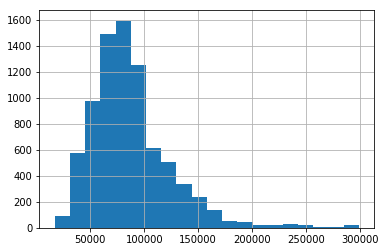

In [37]:
data.pret.hist(bins=20)
plt.show()

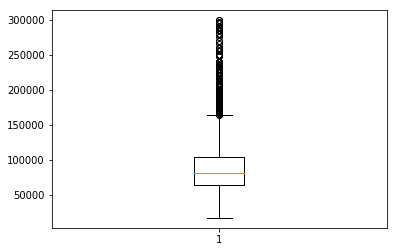

In [38]:
plt.boxplot(data.pret)
plt.show()

In [39]:
data = data[data['suprafata'] < 250]

In [40]:
data = data[data['suprafata'] > 10]

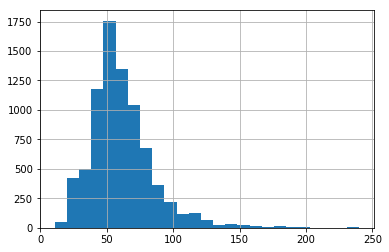

In [41]:
data.suprafata.hist(bins=25)
plt.show()

In [42]:
_ = tipuri_date()
_

{dtype('int64'): Index(['pret', 'suprafata'], dtype='object'),
 dtype('O'): Index(['titlu', 'oras', 'grad_finisare', 'descriere', 'tip_oferta', 'persoana',
        'etaj', 'vechime_imobil', 'numar_bai', 'numar_balcoane',
        'geamuri_termopan', 'centrala_termica', 'compatimentare', 'parchet',
        'confort', 'gresie', 'faianta', 'zugravit_lavabil', 'loc_parcare',
        'agentie', 'numar_camere', 'strada', 'cartier', 'link',
        'modificari_interioare', 'balcoane_inchise', 'aer_conditionat',
        'loc_in_pod', 'loc_in_pivnita', 'uscator'],
       dtype='object')}

Vom creea o coloana noua, "pret/suprafata", pentru a putea analiza mai bine datele.

In [43]:
data['pret/suprafata']= data['pret'] // data['suprafata']

In [44]:
data.suprafata.dtypes

dtype('int64')

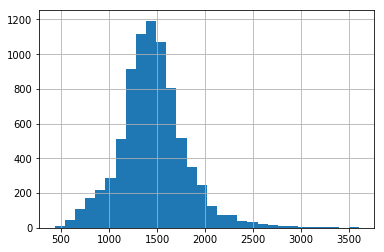

In [45]:
data['pret/suprafata'].hist(bins=30)
plt.show()

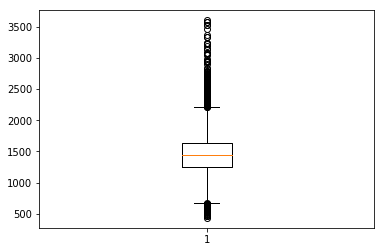

In [46]:
plt.boxplot(data['pret/suprafata'])
plt.show()

Vom formata coloana "numar_camere" pentru a avea doar date numerice de tip int.

In [47]:
def camere_modificare(column):
    column = str(column)
    column = re.sub(r'\D', '', column)
    return column

data['numar_camere'] = data['numar_camere'].apply(camere_modificare)

In [48]:
data = data[data['numar_camere'] != '']

In [49]:
def camere_int(column):
    column = int(column)
    return column

data['numar_camere'] = data['numar_camere'].apply(camere_int)

In [50]:
data['numar_camere'].value_counts()

2    3302
3    2618
1    1280
4    730 
5    54  
6    8   
7    1   
Name: numar_camere, dtype: int64

In [51]:
coloane = data.columns.tolist()

In [52]:
coloane

['titlu',
 'pret',
 'oras',
 'grad_finisare',
 'descriere',
 'tip_oferta',
 'persoana',
 'etaj',
 'vechime_imobil',
 'numar_bai',
 'numar_balcoane',
 'geamuri_termopan',
 'centrala_termica',
 'compatimentare',
 'parchet',
 'confort',
 'gresie',
 'faianta',
 'zugravit_lavabil',
 'loc_parcare',
 'agentie',
 'numar_camere',
 'strada',
 'suprafata',
 'cartier',
 'link',
 'modificari_interioare',
 'balcoane_inchise',
 'aer_conditionat',
 'loc_in_pod',
 'loc_in_pivnita',
 'uscator',
 'pret/suprafata']

In [53]:
len(data)

7993

In [54]:
data.dropna(subset=['cartier'], inplace=True) 

In [55]:
len(data)

7613

In [56]:
first

['pret',
 'etaj',
 'vechime_imobil',
 'numar_camere',
 'cartier',
 'suprafata',
 'compatimentare']

In [57]:
_ = valori_nule(first)

pret 0
etaj 1298
vechime_imobil 1843
numar_camere 0
cartier 0
suprafata 0
compatimentare 1216


In [58]:
_ = valori_unice(coloane)
_

titlu 

 Apartament 2  camere de vanzare in Manastur                                                  112
Apartament 3  camere de vanzare in Manastur                                                  101
Apartament 2 camere                                                                          94 
Apartament 2  camere de vanzare in Centru                                                    93 
Apartament 2  camere de vanzare in Gheorgheni                                                89 
Apartament 3  camere de vanzare in Marasti                                                   86 
Apartament 3 camere                                                                          64 
Apartament 2  camere de vanzare in Marasti                                                   62 
Apartament 3  camere de vanzare in Buna Ziua                                                 54 
Apartament 3  camere de vanzare in Centru                                                    51 
                     

 Da    4554
Name: zugravit_lavabil, dtype: int64


loc_parcare 

 Da    2342
Name: loc_parcare, dtype: int64


agentie 

 NAPOCA Imobiliare      1397
MEIN HAUS              969 
EDIL                   654 
REMS Imobiliare        496 
IMOFINDER              434 
Axa Imobiliare         390 
Koncept Imobiliare     334 
Habitas Imobiliare     272 
Tara Imobiliare        217 
Welt Imobiliare        213 
                      ...  
Pentalar imobiliare    1   
TOP REAL INTERMED      1   
Piacenza               1   
Apartamente Cluj       1   
EUMIPA                 1   
Imobiliare Dobra       1   
pf                     1   
Persoana fizica        1   
fara                   1   
Saphir Imobiliare      1   
Name: agentie, Length: 98, dtype: int64


numar_camere 

 2    3130
3    2498
1    1222
4    704 
5    50  
6    8   
7    1   
Name: numar_camere, dtype: int64


strada 

 -                      3897
.                      556 
-                      95  
Fabricii               36  
Dorob

In [59]:
writer = pd.ExcelWriter(r'C:\Users\Scurtu Mihai\Desktop\data_curate2.xlsx')
data.to_excel(writer,'Sheet1')
writer.save()

In [60]:
file_name= r'C:\Users\Scurtu Mihai\Desktop\date_curatate3.csv'
data.to_csv(file_name, sep='\t', encoding='utf-8', index=False)

In [61]:
file_name2= r'C:\Users\Scurtu Mihai\Desktop\date.pkl'

In [62]:
data.to_pickle(file_name2)